LIBRERIAS

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import shapiro

IMPORTACIÓN DE DATASET

In [2]:
beer = pd.read_csv("./beer_ML.csv")
beer = beer.copy()
beer.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [3]:
beer.shape

(3197, 25)

In [4]:
beer.dtypes

Name                  object
Style                 object
Brewery               object
Beer Name (Full)      object
Description           object
ABV                  float64
Min IBU                int64
Max IBU                int64
Astringency            int64
Body                   int64
Alcohol                int64
Bitter                 int64
Sweet                  int64
Sour                   int64
Salty                  int64
Fruits                 int64
Hoppy                  int64
Spices                 int64
Malty                  int64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
review_overall       float64
number_of_reviews      int64
dtype: object

In [5]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [6]:
beer.columns

Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

INFORMACIÓN ESTADÍSTICA DE LOS PARÁMETROS:

In [7]:
beer.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


In [8]:
beer.describe(include=object)

,Name,Style,Brewery,Beer Name (Full),Description
count,3197,3197,3197,3197,3197
unique,3066,111,934,3197,1841
top,Oktoberfest,Lager - Adjunct,Boston Beer Company (Samuel Adams),Alaskan Brewing Co. Alaskan Amber,Notes:
freq,12,45,40,1,1347


VALORES ÚNICOS DE VARIABLES NO NUMÉRICAS:

In [9]:
# PARA EVALUAR UNA POSIBLE CATEGORIZACIÓN

unicos_nombre = beer["Name"].nunique()
valores_unicos_nombre = beer["Name"].unique()

unicos_estilo = beer["Style"].nunique()
valores_unicos_estilo = beer["Style"].unique()


print(unicos_nombre)
print(valores_unicos_nombre)
print(unicos_estilo)
print(valores_unicos_estilo)

3066
['Amber' 'Double Bag' 'Long Trail Ale' ... 'Red Nose Winter Ale'
 'Fish Tale Winterfish' 'Frosted Frog Christmas Ale - Barrel-Aged']
111
['Altbier' 'Barleywine - American' 'Barleywine - English'
 'Bitter - English Extra Special / Strong Bitter (ESB)' 'Bitter - English'
 'Bière de Champagne / Bière Brut' 'Blonde Ale - American'
 'Blonde Ale - Belgian' 'Bock - Doppelbock' 'Bock - Eisbock'
 'Bock - Maibock' 'Bock - Traditional' 'Bock - Weizenbock' 'Braggot'
 'Brett Beer' 'Brown Ale - American' 'Brown Ale - Belgian Dark'
 'Brown Ale - English' 'California Common / Steam Beer' 'Chile Beer'
 'Cream Ale' 'Dubbel' 'Farmhouse Ale - Bière de Garde'
 'Farmhouse Ale - Sahti' 'Farmhouse Ale - Saison' 'Fruit and Field Beer'
 'Gruit / Ancient Herbed Ale' 'Happoshu' 'Herb and Spice Beer'
 'IPA - American' 'IPA - Belgian' 'IPA - Black / Cascadian Dark Ale'
 'IPA - English' 'IPA - Imperial' 'IPA - New England' 'Kvass' 'Kölsch'
 'Lager - Adjunct' 'Lager - American Amber / Red' 'Lager - American'
 'L

REVISIÓN DE DUPLICADOS:

In [10]:
beer.duplicated().sum()

0

REVISIÓN DE VALORES NULOS:

In [11]:
porcentaje_error = (beer.isnull().sum() / len(beer)) * 100
porcentaje_error

Name                 0.0
Style                0.0
Brewery              0.0
Beer Name (Full)     0.0
Description          0.0
ABV                  0.0
Min IBU              0.0
Max IBU              0.0
Astringency          0.0
Body                 0.0
Alcohol              0.0
Bitter               0.0
Sweet                0.0
Sour                 0.0
Salty                0.0
Fruits               0.0
Hoppy                0.0
Spices               0.0
Malty                0.0
review_aroma         0.0
review_appearance    0.0
review_palate        0.0
review_taste         0.0
review_overall       0.0
number_of_reviews    0.0
dtype: float64

REVISIÓN DE VALORES EXTREMOS (OUTLIERS):

La columna ABV tiene 157 outliers, que representan el 4.91% del total de filas.


La columna Min IBU tiene 267 outliers, que representan el 8.35% del total de filas.
La columna Max IBU tiene 255 outliers, que representan el 7.98% del total de filas.
La columna Astringency tiene 106 outliers, que representan el 3.32% del total de filas.
La columna Body tiene 132 outliers, que representan el 4.13% del total de filas.
La columna Alcohol tiene 227 outliers, que representan el 7.10% del total de filas.
La columna Bitter tiene 58 outliers, que representan el 1.81% del total de filas.
La columna Sweet tiene 61 outliers, que representan el 1.91% del total de filas.
La columna Sour tiene 214 outliers, que representan el 6.69% del total de filas.
La columna Salty tiene 443 outliers, que representan el 13.86% del total de filas.
La columna Fruits tiene 23 outliers, que representan el 0.72% del total de filas.
La columna Hoppy tiene 98 outliers, que representan el 3.07% del total de filas.
La columna Spices tiene 229 outliers, que representan el 7.16% del total de filas.
La col

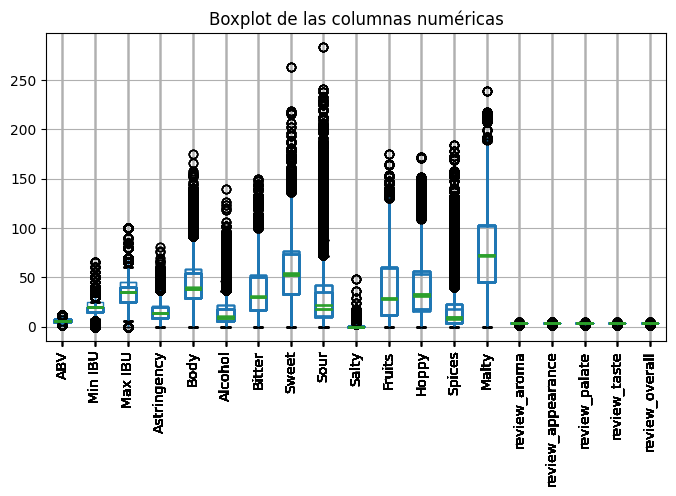

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
298,La Félix,Bock - Eisbock,"Le Bilboquet, Brasseur Artisan","Le Bilboquet, Brasseur Artisan La Félix",Notes:,5.00,25,35,1,5,...,8,6,0,8,3.750000,3.750000,4.000000,4.000000,2.750000,2
456,Werewolf,Brown Ale - Belgian Dark,Rinkuškiai Alaus Darykloje,Rinkuškiai Alaus Darykloje Werewolf,Notes:Lithuania’s world-famous beer-making tra...,8.20,15,25,7,35,...,40,16,4,76,2.951923,3.278846,2.855769,2.903846,2.807692,52
541,Jalapeño Pepper Ale,Chile Beer,Bent River Brewing Company,Bent River Brewing Company Jalapeño Pepper Ale,Notes:,4.81,0,0,4,11,...,3,11,4,24,3.214286,3.357143,3.142857,3.142857,2.642857,7
552,Hot Chocolate,Chile Beer,Valkyrie Brewing,Valkyrie Brewing Hot Chocolate,Notes:,5.25,0,0,3,91,...,2,10,4,95,3.294872,3.012821,2.974359,3.025641,2.743590,39
556,El Lapino,Chile Beer,Microbrasserie du Lièvre,Microbrasserie du Lièvre El Lapino,Notes:,5.40,0,0,1,8,...,6,3,4,12,3.500000,4.000000,4.000000,4.000000,1.136364,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,Foreign Style Stout,Stout - Foreign / Export,Upslope Brewing Company,Upslope Brewing Company Stout,Notes:,6.90,30,70,24,98,...,28,17,9,117,3.250000,3.500000,2.750000,2.750000,2.500000,2
2945,Dark Wheat,Wheat Beer - American Dark,The Merchant Ale House Restaurant & Brewpub,The Merchant Ale House Restaurant & Brewpub Da...,Notes:Our Dark Wheat is made from 50% wheat ma...,5.20,10,35,0,0,...,5,6,0,7,3.000000,3.250000,4.000000,2.750000,2.750000,2
2969,Blue Moon Spring Blonde Wheat AleCoors Brewing...,Wheat Beer - American Pale,Coors Brewing Company,Coors Brewing Company Blue Moon Spring Blonde ...,Notes:,5.40,10,35,16,42,...,70,24,6,89,2.680328,4.000000,2.795082,4.000000,2.803279,61
3127,Kronenbourg 1664 Blanc,Wheat Beer - Witbier,Brasseries Kronenbourg,Brasseries Kronenbourg Kronenbourg,Notes:,5.00,10,20,20,33,...,86,63,42,48,3.500000,4.000000,4.000000,4.000000,2.379310,29


In [12]:
columnas_outliers = ['ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall']

n_filas = beer.shape[0]

for col in columnas_outliers:

 Q1 = beer[col].quantile(0.25)
 Q3 = beer[col].quantile(0.75)
 IQR = Q3 - Q1

 limite_inferior = Q1 - 1.5 * IQR
 limite_superior = Q3 + 1.5 * IQR

 outliers = beer[(beer[col] < limite_inferior) | (beer[col] > limite_superior)]


 moda = beer[col].mode()[0]
 beer[col] = beer[col].mask((beer[col] < limite_inferior) | (beer[col] > limite_superior), moda)

 n_outliers = len(outliers)
 porcentaje = (n_outliers / n_filas) * 100

 print(f"La columna {col} tiene {n_outliers} outliers, que representan el {porcentaje:.2f}% del total de filas.")

 beer.boxplot(column=columnas_outliers, rot=90, figsize=(8,4))
 
plt.title("Boxplot de las columnas numéricas")
plt.show()
outliers

HISTOGRAMA PARA VER NORMALIDAD:

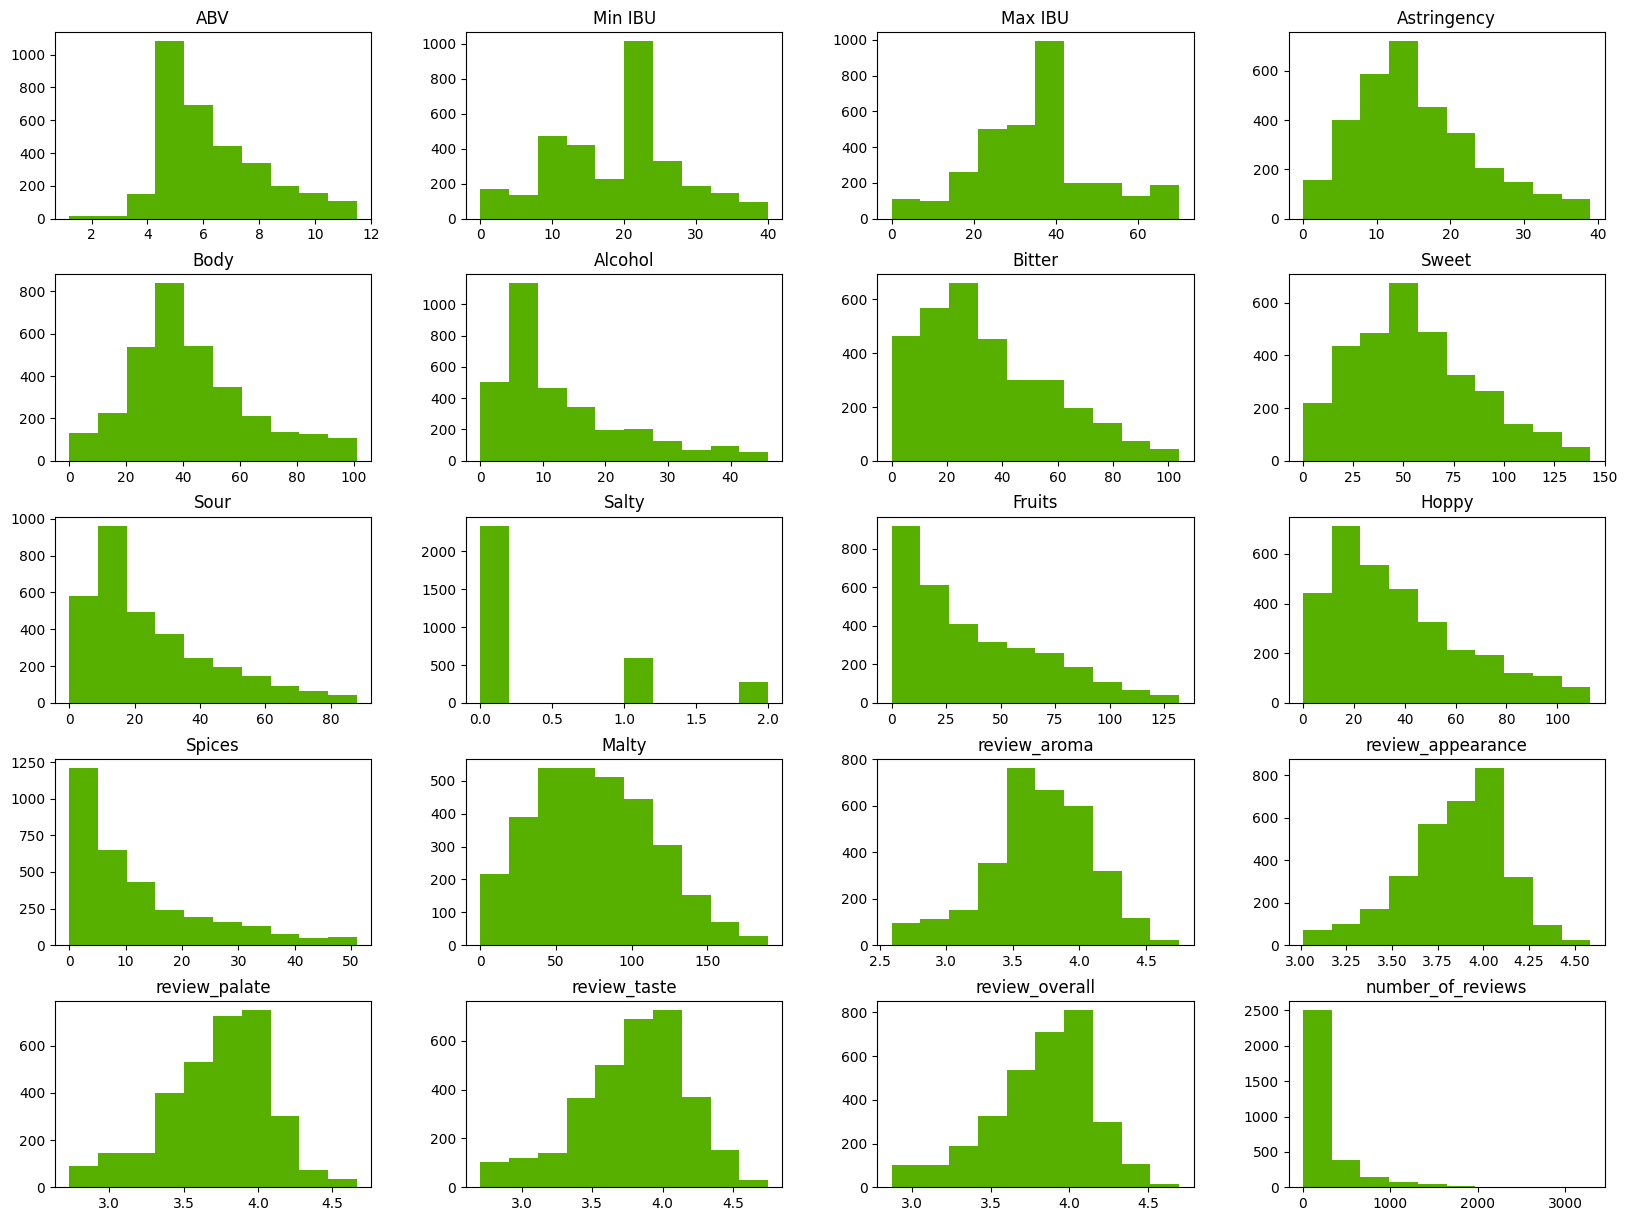

In [13]:
azul = "#57b000"
beer.hist(figsize=(20,15), grid=False, color=azul);
plt.show()

In [14]:
# Se comprueba, mediante test de normalidad Shapiro, si el p-valor es menor que 
# el nivel de significancia (0.05).

columnas_shapiro = ['ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews']

for column in columnas_shapiro:
    statistic, p_value = stats.shapiro(beer[column])
    
    if p_value < 0.05:
        print(f"Variable '{column}' no sigue una distribución normal.")
    else:
        print(f"Variable '{column}' sigue una distribución normal.")

Variable 'ABV' no sigue una distribución normal.
Variable 'Min IBU' no sigue una distribución normal.
Variable 'Max IBU' no sigue una distribución normal.
Variable 'Astringency' no sigue una distribución normal.
Variable 'Body' no sigue una distribución normal.
Variable 'Alcohol' no sigue una distribución normal.
Variable 'Bitter' no sigue una distribución normal.
Variable 'Sweet' no sigue una distribución normal.
Variable 'Sour' no sigue una distribución normal.
Variable 'Salty' no sigue una distribución normal.
Variable 'Fruits' no sigue una distribución normal.
Variable 'Hoppy' no sigue una distribución normal.
Variable 'Spices' no sigue una distribución normal.
Variable 'Malty' no sigue una distribución normal.
Variable 'review_aroma' no sigue una distribución normal.
Variable 'review_appearance' no sigue una distribución normal.
Variable 'review_palate' no sigue una distribución normal.
Variable 'review_taste' no sigue una distribución normal.
Variable 'review_overall' no sigue un

In [20]:
beer

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Winter Shredder,Winter Warmer,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,Notes:,8.8,35,50,15,37,...,23,45,4,74,4.125000,3.875000,3.875000,3.750000,4.000000,4
3193,The First Snow Ale,Winter Warmer,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,Notes:This hearty American pale ale contains a...,6.0,35,50,15,31,...,54,14,4,58,3.950000,3.750000,3.760000,3.790000,3.730000,50
3194,Red Nose Winter Ale,Winter Warmer,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Notes:,6.8,35,50,8,44,...,26,21,4,77,3.576923,3.711538,3.596154,3.673077,3.711538,26
3195,Fish Tale Winterfish,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,Notes:,7.5,35,50,11,36,...,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310,87


ELIMINACIÓN DE COLUMNAS IRRELEVANTES:

In [21]:
parametros_eliminados = ["beer name (full)", "description", "number_of_reviews", "brewery"]
beer.columns = beer.columns.str.strip().str.lower()

birra = beer.drop(columns=parametros_eliminados, axis=1)

beer.drop(columns=parametros_eliminados, axis=1, inplace=True)

RENOMBRADO DE COLUMNAS Y MODIFICACION DE DECIMALES:

In [22]:
birra.rename(columns={'name': 'nombre', 'style': 'estilo','abv': 'alcohol_%', 'min ibu': 'min_IBU',
                    'max ibu': 'max_IBU', 'astringency': 'astringencia', 'body': 'cuerpo',
                    'alcohol': 'alcohol_gr/lt', 'bitter': 'amargor', 'sweet': 'dulzor', 'sour': 'acidez',
                    'salty': 'salado','fruits': 'frutado', 'hoppy': 'lupulo','spices': 'especias',
                    'malty': 'malteado','review_aroma': 'opinion_aroma',
                    'review_appearance': 'opinion_apariencia', 'review_palate': 'opinion_paladar',
                    'review_taste': 'opinion_sabor', 'review_overall': 'opinion_general'}
                    , inplace=True)  

In [23]:
birra[["opinion_aroma",	"opinion_apariencia",	"opinion_paladar",	"opinion_sabor",	
       "opinion_general"]] = birra[["opinion_aroma",	"opinion_apariencia",	
       "opinion_paladar",	"opinion_sabor",	"opinion_general"]].round(decimals=2)      

In [24]:
birra

,nombre,estilo,alcohol_%,min_IBU,max_IBU,astringencia,cuerpo,alcohol_gr/lt,amargor,dulzor,...,salado,frutado,lupulo,especias,malteado,opinion_aroma,opinion_apariencia,opinion_paladar,opinion_sabor,opinion_general
0,Amber,Altbier,5.3,25,50,13,32,9,47,74,...,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85
1,Double Bag,Altbier,7.2,25,50,12,57,18,33,55,...,0,24,35,12,84,3.80,3.85,3.90,4.02,4.03
2,Long Trail Ale,Altbier,5.0,25,50,14,37,6,42,43,...,0,10,54,4,62,3.41,3.67,3.60,3.63,3.83
3,Doppelsticke,Altbier,8.5,25,50,13,55,31,47,101,...,1,49,40,16,119,4.15,4.03,4.15,4.21,4.01
4,Sleigh'r Dark Doüble Alt Ale,Altbier,7.2,25,50,25,51,26,44,45,...,1,11,51,20,95,3.62,3.97,3.73,3.77,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Winter Shredder,Winter Warmer,8.8,35,50,15,37,24,35,46,...,0,23,45,4,74,4.12,3.88,3.88,3.75,4.00
3193,The First Snow Ale,Winter Warmer,6.0,35,50,15,31,23,16,54,...,0,54,14,4,58,3.95,3.75,3.76,3.79,3.73
3194,Red Nose Winter Ale,Winter Warmer,6.8,35,50,8,44,24,19,52,...,0,26,21,4,77,3.58,3.71,3.60,3.67,3.71
3195,Fish Tale Winterfish,Winter Warmer,7.5,35,50,11,36,7,70,72,...,0,81,110,18,73,3.90,3.89,3.86,3.90,3.88


HEATMAP PARA EVALUAR LA CORRELACIÓN ENTRE LAS VARIABLES DEL DATAFRAME:

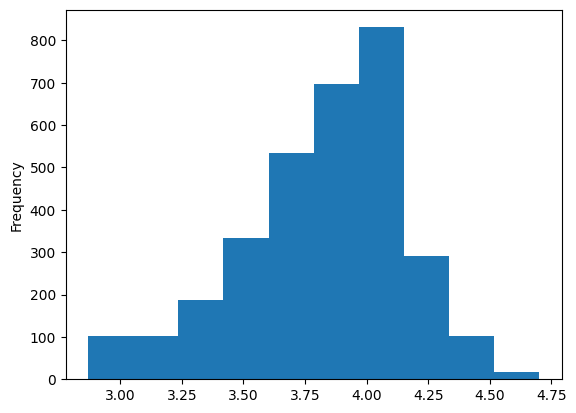

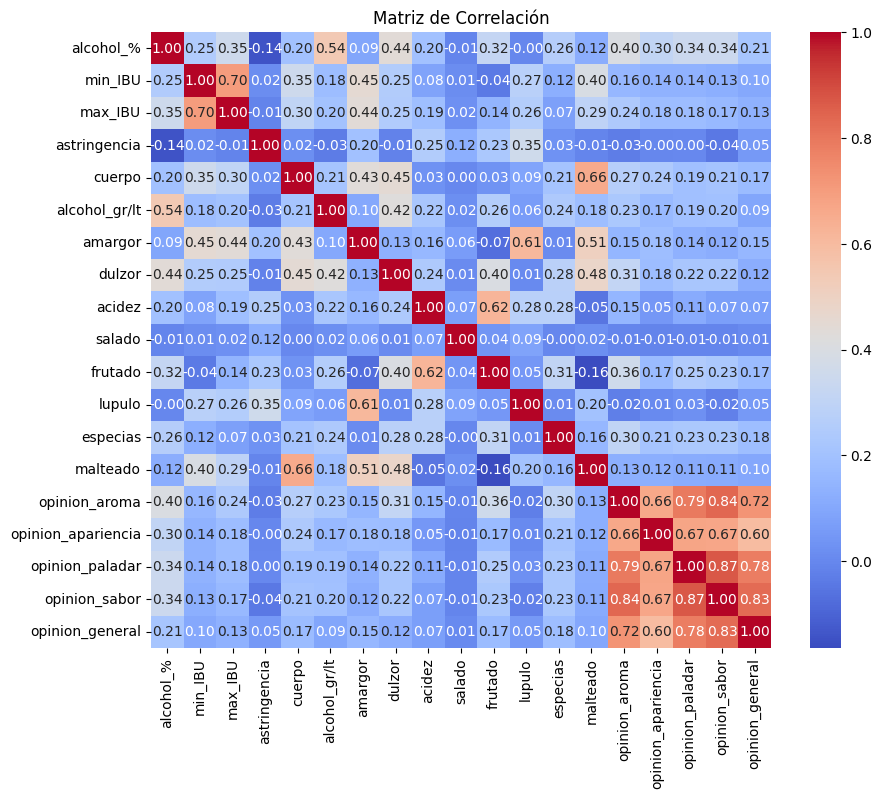

In [32]:
birra_numerico = birra.drop(["nombre", "estilo"], axis=1)

correlation_matrix = birra_numerico.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Se observa que la TARGET del modelo tiene una distribución bastante normal de los datos.

Existe bastante correlación entre algunos parámetros del dataset, fundamentalmente entre aquellas variables de entrada correspondientes a la opinión de la gente sobre la cerveza.

GUARDADO DE DATAFRAME:

In [26]:
birra.to_csv('cerveza.csv', index=False)